In [8]:
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("config.yml")

In [9]:
from detectron2.engine import DefaultPredictor

predictor = DefaultPredictor(cfg)

/home/alex/Projects/Detectron2_DocLayNet/.venv/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

In [10]:
import cv2

output = predictor(cv2.imread("image.jpg"))

/home/alex/Projects/Detectron2_DocLayNet/.venv/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
output

{'instances': Instances(num_instances=9, image_height=600, image_width=600, fields=[pred_boxes: Boxes(tensor([[310.6141, 465.2508, 531.2928, 592.1310],
         [309.2152, 225.0229, 532.9542, 458.4898],
         [ 89.3375, 245.6505, 277.1577, 480.4957],
         [117.9718, 103.1767, 489.6597, 167.6400],
         [ 72.6605, 521.2045, 293.1664, 586.8737],
         [ 72.0811, 498.0929, 155.3862, 508.1105],
         [160.9203, 218.6801, 205.3214, 227.8557],
         [ 81.2880,  63.3399, 519.2657,  75.0548],
         [ 74.2290, 588.8892, 292.3573, 595.8657]], device='cuda:0')), scores: tensor([0.9890, 0.9888, 0.9828, 0.9778, 0.9707, 0.8828, 0.8085, 0.7531, 0.7511],
        device='cuda:0'), pred_classes: tensor([9, 9, 9, 9, 9, 7, 7, 7, 9], device='cuda:0')])}

In [12]:
import json

with open("metadata.json", "r") as f:
    metadata_dict = json.load(f)

metadata_dict["thing_classes"]

['Caption',
 'Footnote',
 'Formula',
 'List-item',
 'Page-footer',
 'Page-header',
 'Picture',
 'Section-header',
 'Table',
 'Text',
 'Title']

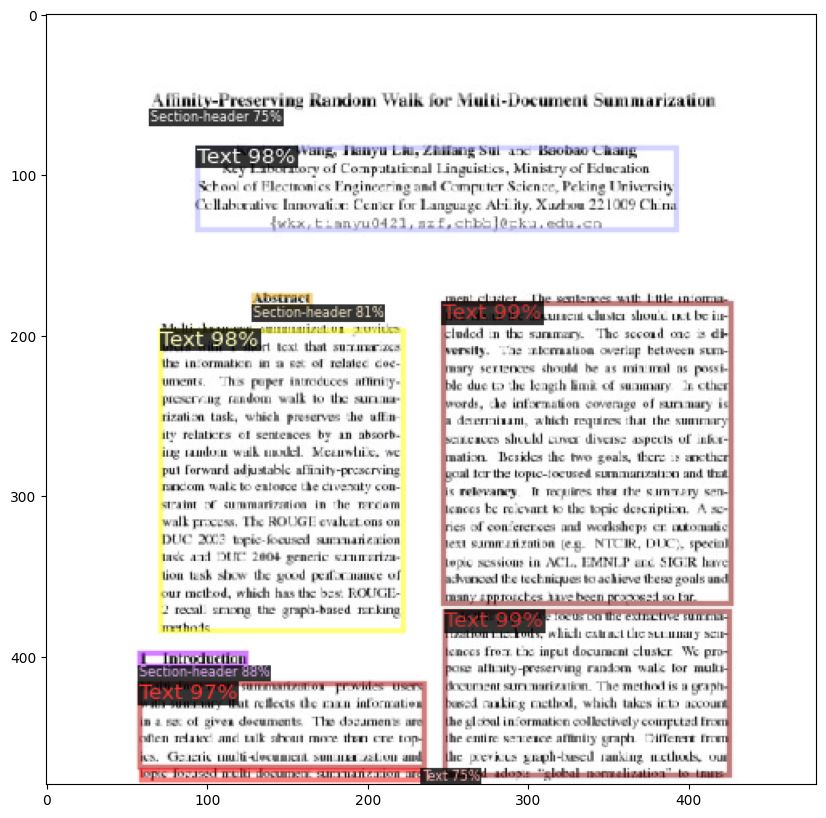

In [13]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import Metadata

metadata = Metadata()
metadata.set(thing_classes=metadata_dict["thing_classes"])
im = cv2.imread("image.jpg")
output = predictor(im)
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
v = v.draw_instance_predictions(output["instances"].to("cpu"))
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()